In [2]:
# Give Access to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Introduction
In this notebook, we perform a **Exploratory Data Analysis (EDA)** on a dataset centered on obesity. Our objective is to move from a high-level overview of the data structure to a detailed investigation of its internal patterns and underlying trends.

The analysis is structured to follow a flow:
* **Structural Assessment:** We will determine the dimensions, data types, and integrity of the dataset (checking for missing or null values).
* **Univariate Analysis:** We will examine Numerical and Categorical variables independently to understand their distributions.
* **Research Reflection:** Finally, we will critically evaluate the study design and propose future enhancements to improve the inferential power of the model.


## Data Acquisition and Structural Overview
We begin by importing the necessary libraries and loading the dataset with the help of pandas. We use the pandas function `read_csv` and the specific path to our data csv file (A1.1 Obesidad.csv) to save it into a variable **data** we will use throughout this notebook. This data comes and is being loaded from the same folder in google Drive.

In [3]:
# Import pandas
import pandas as pd

# Start with the initial data loding "A1.1 Obesidad.csv" with the help of pandas
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/AI/A1.1 Obesidad.csv")

# Confirmation message
print("Import Complete :)")

Import Complete :)


The first step in our exploration is to visualize the top 5 rows of the dataset using the `.head()` method. This is a quality-control step to confirm that the data was loaded correctly.

As an overview, and due to the size of the dataset, we can already distinguish between **numerical** (eg. `edad`) and **categorical** (eg. `ComeMuchasCalorias`) columns. Also, in these first few rows, we can observe interesting facts like:

*   The fact that `Estatura` is recorded in meters and `Peso` in kgs.

This "snapshot" ensures that the data types match our expectations before we move into deeper.

In [4]:
# Head to confirm the data and get top 5 results
data.head()

,Sexo,Edad,Estatura,Peso,FamiliarConSobrepeso,ComeMuchasCalorias,ComeVegetales,Fumador,ConsumoDeAgua,NivelDeObesidad
0,Female,21.0,1.62,64.0,yes,no,2.0,no,2.0,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,yes,3.0,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,no,2.0,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,no,2.0,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,no,2.0,Overweight_Level_II


Before diving into specific variables, we perform a **Dimension Analysis** using `.shape`, getting into both the subscript 0 for the rows and 1 for the cols (both which were saved in their respective variables `rows` and `cols`, that can be further used in the laboratory).

In this study, we are working with a dataset of **2111 rows and 10 columns**, providing a solid foundation.

In [5]:
# Start with general dimension analysis
rows = data.shape[0]
cols = data.shape[1]
print(f"Rows: {rows}\nColumns: {cols}\n")

Rows: 2111
Columns: 10



Furthermore I decided on running `.info()` to helps us draw several  conclusions regarding the structure and quality of our dataset:

* **Completeness:** Every single column has **2,111 non-null values**. This indicates that there is **no missing data** in this dataset. We do not need to be filling in gaps or drop rows.
* **Type Distribution:** The 10 columns are split evenly between two types:
    * **Numerical:** 5 columns representing continuous measurements such as `Edad`, `Estatura`, `Peso`, `ComeVegetales`, and `ConsumoDeAgua`.
    * **Categorical:** 5 columns representing qualitative traits or labels, such as `Sexo`, `Fumador`, and the target variable `NivelDeObesidad`.
This was a very interesting cell that provides a lot of insight, even the memory usage is present, with a value of approximately 166Kb (lightweight)

In [6]:
# Analysis on type of data and structure
data.info()
# null count specifics (not used here, as .info answers it)
# data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sexo                  2111 non-null   object 
 1   Edad                  2111 non-null   float64
 2   Estatura              2111 non-null   float64
 3   Peso                  2111 non-null   float64
 4   FamiliarConSobrepeso  2111 non-null   object 
 5   ComeMuchasCalorias    2111 non-null   object 
 6   ComeVegetales         2111 non-null   float64
 7   Fumador               2111 non-null   object 
 8   ConsumoDeAgua         2111 non-null   float64
 9   NivelDeObesidad       2111 non-null   object 
dtypes: float64(5), object(5)
memory usage: 165.1+ KB


In the following cells we focus on the main catgorical data exploration, we begin by saving the data in a single variable `categorical_cols` for future reference and just general division of columns, which comes in handy. In this specific notebook we will hardcode because the size of the dataset allows for it, in other cases you have to save though selection of the `object` data type.

Furthermore, to understand the diversity of our data, we performed a frequency analysis using `.value_counts()` on all categorical variables. This was done with the helo of a loop that runs through all the values in `categorical_cols` and selects them in the following way: `print(f"{data[c].value_counts()}\n")`, `c` ofc being the specific column name.

This analysis allows us to see the "proportions" (numbers of unique values) within the data, which is essential for identifying biases or trends.

#### **Key Findings:**

* **Gender Balance:** The sample is pretty balanced between **Male (1,068)** and **Female (1,043)**.
* **Family History and Diet:** A vast majority of participants (**1,726**) have a family history of overweight, and a similarly high number (**1,866**) frequently consume high-calorie food.
* **Smoking Status:** There is a relevant to mention imbalance here; only **44 participants are smokers**, while 2,067 are not. This means  any inference regarding the impact of smoking on obesity will have a higher margin of error due to the small sample size.
* **Target Variable (NivelDeObesidad):** The distribution of obesity levels is pretty uniform across all 7 categories. This is excellent for a study because it means the model has enough examples of every stage. Its also important to notice it goes from extermely skinny to obese type 3, which gives a broader area, not only obese but also even "anorexic" people (tho samples aren't as big).


In [7]:
# Here we can save the categorical columns in a variable
# For simplicity here hardcode
categorical_cols = ["Sexo", "FamiliarConSobrepeso", "ComeMuchasCalorias", "Fumador", "NivelDeObesidad"]


In [8]:
# For qualitative data we can get a data description
for c in categorical_cols:
  # Get the data present in categories and how many of each there are
  print(f"{data[c].value_counts()}\n")

Sexo
Male      1068
Female    1043
Name: count, dtype: int64

FamiliarConSobrepeso
yes    1726
no      385
Name: count, dtype: int64

ComeMuchasCalorias
yes    1866
no      245
Name: count, dtype: int64

Fumador
no     2067
yes      44
Name: count, dtype: int64

NivelDeObesidad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64



The final step of our initial exploration is a statistical analysis of the numerical features using `.describe()`. This provides a mathematical overview of our population and helps identify "normal" range against extreme cases.

#### **Key Insights:**

* **Age Profile:** The average participant is **24 years old**, with a standard deviation of 6.3 years. Interestingly, the data ranges from a minimum of **14** to a maximum of **61**, indicating that the study covers both adolescents and older adults, though the 75th percentile (26 years) shows the population is heavily skewed toward **younger ppl**.
* **Body Values:** * The average height is **1.70m**. The Weight shows significant variability (Std Dev = 26.19 kg), ranging from a min of **39 kg** to a max of **173 kg**. This captures lots of body types.
* **Lifestyle Habits:**
    * Most participants report eating vegetables frequently (mean of 2.4 on a scale, with 75% of people at 3.0). Good or bad? still a bit uncertain what is global health person average value...
    * Water consumption is centered right at **2.0 units**, suggesting a consistent habit, not big differentiatior for maybe correlations.

With this we can also tell there is no imporssible data with the min and max, as the top values of heigh and age and weight (mentioned previously) are humanly possible.

In [9]:
# For quantitative data, we can get a general math description
data.describe()


,Edad,Estatura,Peso,ComeVegetales,ConsumoDeAgua
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.008011
std,6.345968,0.093305,26.191172,0.533927,0.612953
min,14.000000,1.450000,39.000000,1.000000,1.000000
25%,19.947192,1.630000,65.473343,2.000000,1.584812
50%,22.777890,1.700499,83.000000,2.385502,2.000000
75%,26.000000,1.768464,107.430682,3.000000,2.477420
max,61.000000,1.980000,173.000000,3.000000,3.000000


## 2. Reflection on Study Design & Additional Variables

The variables present in this study are quite broad, ranging from numerical to categorical as explained previously. Most of them are highly relevant to the topic of obesity; however, the scope could be expanded to dig into many other health variables that would be useful to the study; from clinical blood test results to specific health conditions. The study could also go further into health and fitness habits, as these can be key determinators and predictors of the **Nivel de Obesidad** (which, in this case, would serve as our **target or $y$ variable**).

In order to provide a more critical and insightful perspective, I decided to research some of the "unnoticed" signs or habits that can lead to obesity even when other lifestyle factors seem perfect. After reviewing a recent study in *Nature* ([Scientific Reports, 2025](https://www.nature.com/articles/s41366-025-01787-5)), I realized that, as the literature shows, sleep deprivation directly affects the hormones **ghrelin** and **leptin**, which regulate hunger and satiety. This would help explain why some participants might "Eat High Calories"; it may be a physiological response to exhaustion rather than just a conscious habit. Therefore, if I were part of the original research team, I would propose the inclusion of a variable measuring **Average Sleep Duration**.

### Nature of the Variable
This variable is **Quantitative**. It would be measured by recording the average number of hours a participant sleeps in a 24-hour cycle over a normal week.

### Justification and Contribution
While the current dataset covers physical metrics (Height, Weight) and some dietary habits, it misses a fundamental pillar of metabolic health: **Sleep Hygiene**. From a health standpoint, knowing if obesity levels are correlated with sleep would allow for more interventions beyond just "diet and exercise." This is especially relevant in today's society where lack of sleep is often romanticized and many individuals are becoming "night owls,".

## 3. Definition of Variable of Interest for Inference
In this study, the Inference Variable (The $y$ or Outcome) is definitely Obesity (i know it sounds general bare with me). Why? In an inference study, the "Target" is the thing you want to explain. You want to infer how $X$ (Age, Weight, Sleep) causes $y$ (Obesity Level). However, i say just obesity and not the variable name because, in the cxase we would like to do a Linear Regression we need a number so in that case the $y$ would be Peso (Weight). But, if we want to do Classification, then NivelDeObesidad is $y$ variable. From what i know till now i will choose Peso to allow me to use all the ifnromation and plot with that i know until the moment (which is linear Regression)

This becomes an Inference Study the moment we start asking "How much does one less hour of sleep increase a person's weight?" It is inference-based because: Relationship over Prediction: You are trying to prove a scientific claim (Sleep $\rightarrow$ Hormones $\rightarrow$ Weight). We will be (in the 4th stage) checking if the effect of sleep is "real" or just a lucky guess.

### Basic Descriptive Analysis of the variable
Based on our initial exploration and a second one done now for re-confirmation:
* **Mean:** 86.58 kg
* **Median:** 83.00 kg
* **Standard Deviation:** 26.19 kg

We used the functions `mean(), median(), std()` ot get this values in a simple manner (in the following code cell).

The fact that the mean is higher than the median, combined with a high standard deviation, indicates that our $y$ variable has a wide spread with a slight positive skew.


In [10]:
avg_weight = data['Peso'].mean()
median_weight = data['Peso'].median()
std_weight = data['Peso'].std()

print(f"Avg Weight: {avg_weight:.2f} kg")
print(f"Median Weight: {median_weight:.2f} kg")
print(f"Standard Deviation: {std_weight:.2f} kg")

Avg Weight: 86.59 kg
Median Weight: 83.00 kg
Standard Deviation: 26.19 kg


## 4. Graphical Analysis in Females: Water Intake vs. Weight

For this analysis, I decided to move away from typical height-based inferences to explore a behavioral variable. While I would have preferred to analyze **Sleep Duration** as proposed in my critical reflection, that data is currently unavailable. Therefore, our focus shifts to the relationship between **Daily Water Consumption** and **Weight**. The goal is to test a common belief *Do people who drink more water tend to have lower weights?* We are exploring this to see if a clear pattern exists or if the data is purely dispersed. For this specific step, we are assuming these variables exist in a "vacuum," focusing purely on their individual correlation without multi-variable complexity.

To create an insightful visualization, I utilized `matplotlib` and `numpy` with the following logic:

* **Female SubSelection**: I started by doing a separate dataset `female_data' filtered, it wss on top of this that we did the plot and variables.
* **Variable Isolation**: We created to variables containing the feature and the $y$ variable, this after filtering the dataset.
    * x = female_data['ConsumoDeAgua']
    * y = female_data['Peso']
* **Scatter Plot (`plt.scatter`):** I used a magenta color (`c='m'`) and an alpha of `0.5`. This transparency reveals the density of the data, showing us where the "dots" are grouped together.
* **Trend Line Analysis:** I used `polyfit` to calculate the best-fit linear relationship ($y = mx + b$). This is a fundamental step in **Inference**, as it calculates the "slope" of the relationship between water and weight.
* **Model Mapping (`np.poly1d`):** This was used to transform those mathematical coefficients into a "Trend Line" that we can overlay on the raw data to see the "average" behavior of the subpopulation.



### Interpretation Results
* **Trend Observation:** The red trend line provides a visual summary of the correlation. Even with the "noise" of over 1,000 female observations, the line allows us to see if drinking more water actually correlates with a change in weight.
* **Dispersion:** By using the scatter plot, we can see the "spread." If the dots are very far from the red line, it indicates that water consumption has a high **Standard Error** and is not the only thing determining weight.
* **Vertical "Stripes"** We can see the "vertical clustering" suggests that water intake was measured in fixed increments, not a complete continuos scale
* **Inference Insight:** This graph serves as a "visual hypothesis test." It helps us determine if `ConsumoDeAgua` is a significant predictor or if the relationship is too weak to be used as a primary health indicator without considering other factors like age or caloric intake.

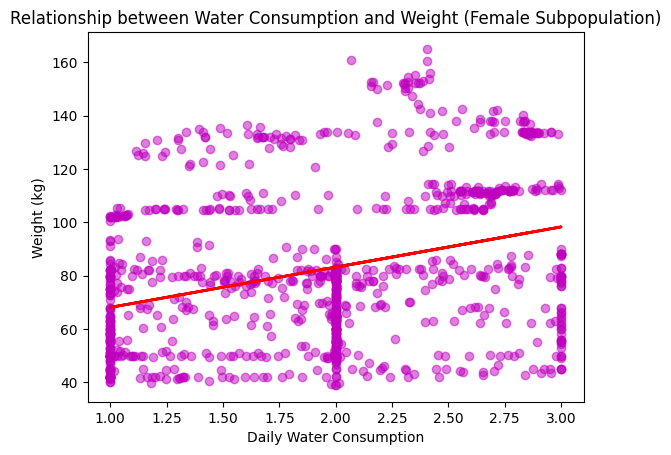

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Select the subpopulation (Females)
female_data = data[data['Sexo'] == 'Female']

# save the data variables
x = female_data['ConsumoDeAgua']
y = female_data['Peso']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color="red", linewidth=2, label='Trend Line') # The red line
plt.scatter(x, y , c='m', alpha=0.5)

# Add labels and title
plt.title('Relationship between Water Consumption and Weight (Female Subpopulation)')
plt.xlabel('Daily Water Consumption')
plt.ylabel('Weight (kg)')
plt.show()

Just by mere further curiosity, I decided to replicate the previous analytical process but swapped the independent variable. While water consumption is a behavioral habit, Height (Estatura) is a primary physical attribute. I wanted to see if the "noise" observed in the first graph was a result of the variable choice or the complexity of the dataset.

## Technical Replication

I followed the exact same methodology used for the water consumption analysis:

* Variable Isolation: Defined $x_2$ as Estatura and $y_2$ as Peso.
* Linear Modeling: Calculated the coefficients using np.polyfit and generated the trend line function $p_2$.
* Visual Contrast: Kept the magenta color scheme (c='m') and transparency to maintain consistency in the report's visuals.

## Interpretation of results

The difference is immediate and striking, unlike the nearly flat line in the water consumption plot, the trend line here has a very steep, positive slope. This confirms a much stronger linear correlation.
While there is still variation, the points cluster much more tightly around the trend line. This comparison proves that in the study of obesity, physical biometrics (like height) provide a much clearer "pathway" for inference than isolated behavioral habits.

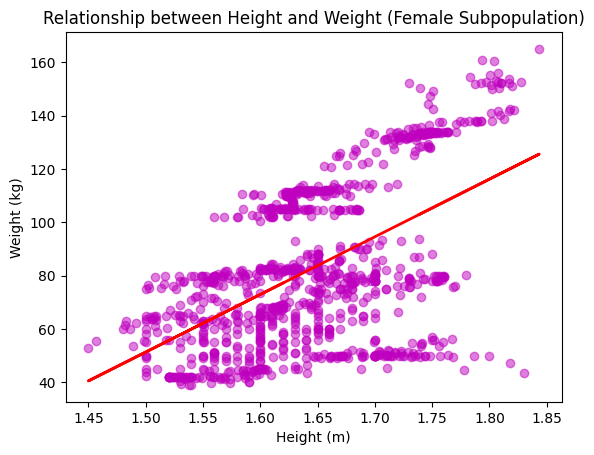

In [15]:
# save the data variables
x_2 = female_data['Estatura']
y_2 = female_data['Peso']

z_2 = np.polyfit(x_2, y_2, 1)
p_2 = np.poly1d(z)
plt.plot(x_2, p(x_2), color="red", linewidth=2, label='Trend Line')
plt.scatter(x_2, y_2, c='m', alpha=0.5)

# Add labels and title
plt.title('Relationship between Height and Weight (Female Subpopulation)')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.show()

## 5. Final Conclusion

After completing this exploratory and graphical analysis of the obesity dataset, we can draw several significant conclusions regarding both the results and the methodology of the study.

* **Lack of a Dominant Pattern:** The relationship between **Daily Water Consumption** and **Weight** in the female subpopulation does not show a clear-cut, predictable pattern. While the trend line shows a slight positive slope, the **dispersion** (the "cloud" of points) confirms that water intake alone is not a strong independent predictor of weight as they varya. lot in our popularion.

### Future ideas?
While playing with the data, I noticed that the **trend line became significantly clearer** when plotting **Height** against **Weight** and the dispersion of the points did, it became too way clearer. In that comparison, the slope was much more obvious and steep. This highlights that physical attributes (like height) often have a more direct mathematical link to mass than behavioral ones (like water). With this however we could say that we cant treat obesity in a "vacuum" with only a variable. To truly understand these patterns, we would need to move toward a **3-dimensional or multi-variable analysis**. By combining multiple layers, we could see a more obvious pathway with Height and Age, combined with Caloric Intake and the **Sleep Duration** variable proposed earlier.


### Final Reflection
The "noise" in our scatter plot is not a failure of the data; it represents the **complexity of human health**. For future research, I recommend utilizing **Multiple Linear Regression** to determine how these variables work together. This would allow us to provide more actionable health insights than looking at habits in isolation.